## Intro

This notebook is a miniproject for investigating on [world happiness report released in 2021](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021) usinng visualizations to gain experience in using Seaborn visualization tools to provide insights on real-world problems. The goal of these visualizations is to investigate the differences in happiness metrics between 2019 and 2020 (before and during COVID19 panadamy) in different countries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import os 
path = os.getcwd()

## Data
The data collected from the survey in 2020 is collected in 2021 and it is seprated from the data collected in previous years. Also, the data collected in 2021 does not include some of columns (some hapiness metrics) that are provided in previous years. Thus, we need to apply some basic data wrangling to make our happiness dataset consistant and prepare it for furthure analysis and visualisations. 

The result dataset will include the following columns:
        'Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'
       
A country's GDP or gross domestic product is calculated by taking into account the monetary worth of a nation's goods and services after a certain period of time, usually one year. It's a measure of economic activity. Social support: Social support is the perception and actuality that one is cared for, has assistance available from other people, and most popularly, that one is part of a supportive social network. Healthy life expectancy: is the average number of years that a newborn can expect to live in "full health". Freedom to make life choices: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties. Generosity: freedom from pettiness in character and mind, Perceptions of corruption: how the people perceive the corruption. 'Positive affect' and 'Negative affect' are not reported for 2021 dataset.'avg' is a deerived variable which shows the average of all happiness metrics. 

In [2]:
#loading files into a DataFrame

# alll years before 2020
my_filepath = '//input//world-happiness-report.csv'
happiness_data = pd.read_csv(path+my_filepath)

# data collected in Feb 2020
my_filepath_2021 = '//input//world-happiness-report-2021.csv'
happiness_data_2021 = pd.read_csv(path+my_filepath_2021) 

# appending 2021 dataset to previous years
#getting coloumns of 2021 that are in common with 2020
selected_2021_cols=['Country name','Ladder score',
        'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
happiness_data_2021 = happiness_data_2021[selected_2021_cols]
happiness_data_2021["year"]=2021

# renaming columns in 2021 data to be consistant with other years
happiness_data_2021.rename(columns={'Ladder score':"Life Ladder", "Logged GDP per capita":"Log GDP per capita", "Healthy life expectancy" : "Healthy life expectancy at birth"}, inplace = True)

#combining all data
happiness_data = happiness_data.append(happiness_data_2021)[happiness_data.columns[:-2]]

#finding the average score
happiness_data['avg'] = happiness_data[happiness_data.columns[2:]].astype(float).mean(axis=1)

happiness_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,avg
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882,9.159000
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850,9.344714
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707,9.424571
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731,9.326000
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776,9.398857
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,8.917714
145,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,10.668714
146,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167,10.595429
147,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,9.927143


First of all, it would be intresting to look at how happiness metrics correlate to eachother, to better understand them. Thus, we compute and illustrate the correlation of happiness metrics over all years and countries. 
The heatmap shows that there is strong positive correlation betwen Life ladder and life expectancy, GDP and social support. However, there is a negative correlation between freedom of choice and making free life decisions.




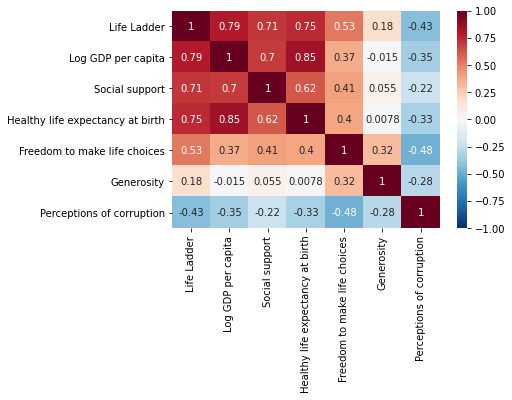

In [66]:
corr_cols = happiness_data.columns[2:-1] #ignore year and country and the average
corr = happiness_data[corr_cols].corr()
plt.figure()
sns.heatmap(corr, center=0, annot=True, vmin=-1, vmax=1, cmap="RdBu_r")
plt.show()

 After data wrangling, we first can compare the distribution of happiness matrics in 2019 and 2020. The distributions shows he happiness metrics have similar median in 2020 than 2019 except in GPD, Social support and Freedom of making life choices. However, this viuslaizations of these metrics include all contries. So, we will have a closer look at the changes of hapinness metrics from 2019 to 2020 for each countries. 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


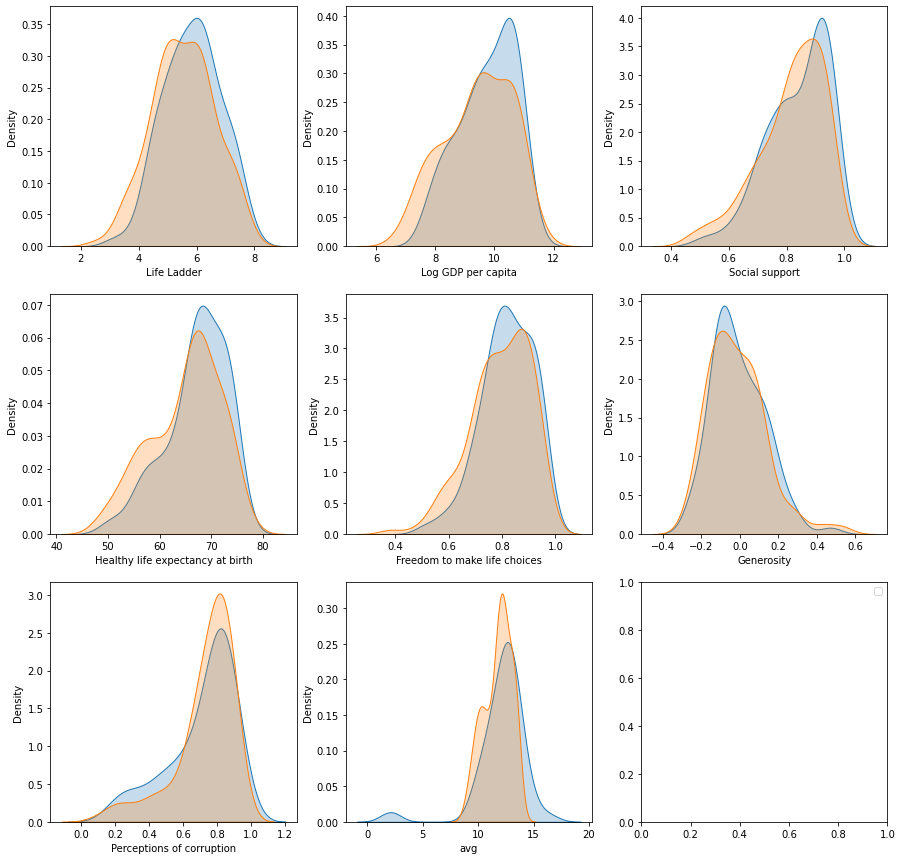

In [3]:
#comparing happiness variables in 2019 and 2020
fig, axes = plt.subplots(3,3,figsize=(15,15))
for col_num,col in enumerate(happiness_data.columns[2:]): # the first column is the year
    sns.kdeplot(data=happiness_data[happiness_data["year"]==2020][col], label="2020", shade=True, ax=axes[col_num//3,col_num%3])
    sns.kdeplot(data=happiness_data[happiness_data["year"]==2021][col], label="2021", shade=True, ax=axes[col_num//3,col_num%3])
    plt.legend()
plt.show()


Since different countries had worse or better situation in managing COVID19, we will have a deeper look at how these happiness metrics changed from 2019 to 2020 in different countries. First, we need to create a new dataset that shows the differences of happiness metrics. The negative values show there was a decrease in a metric and positive values indicates an increase in the happiness metric.

In [4]:
#selecting data from 2020 and 2019 
cols = ['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'avg']

happiness_data_20 = happiness_data[happiness_data["year"]==2020].set_index("Country name")[cols]
happiness_data_21 = happiness_data[happiness_data["year"]==2021].set_index("Country name")[cols]


difference = happiness_data_21 - happiness_data_20
difference.dropna(inplace=True)
difference.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,avg
Country name,,,,,,,,
Albania,-0.248,0.023,-0.013,-0.301,0.031,-0.037,0.010,-0.076429
Argentina,0.028,0.112,0.001,-0.200,0.005,-0.060,0.018,-0.013714
Australia,0.046,0.036,0.003,-0.300,0.009,-0.051,-0.049,-0.043714
Austria,0.055,0.055,0.009,-0.300,-0.004,0.031,0.017,-0.019571
Bangladesh,-0.255,-0.018,-0.046,-0.500,0.100,-0.032,-0.060,-0.115857


The following visualisation illustrates how each happiness metrics has descreased or increased for each country. It can be seen that the most significant decrease was in 'life expectancy'. However, United States and Georgia had a minor increase in 'life expectancy'. Countries such as Netherlands, Japan, Norway and Iceland are had the least changes. Also 'perception of corruption' has incresed in a lot of countries.

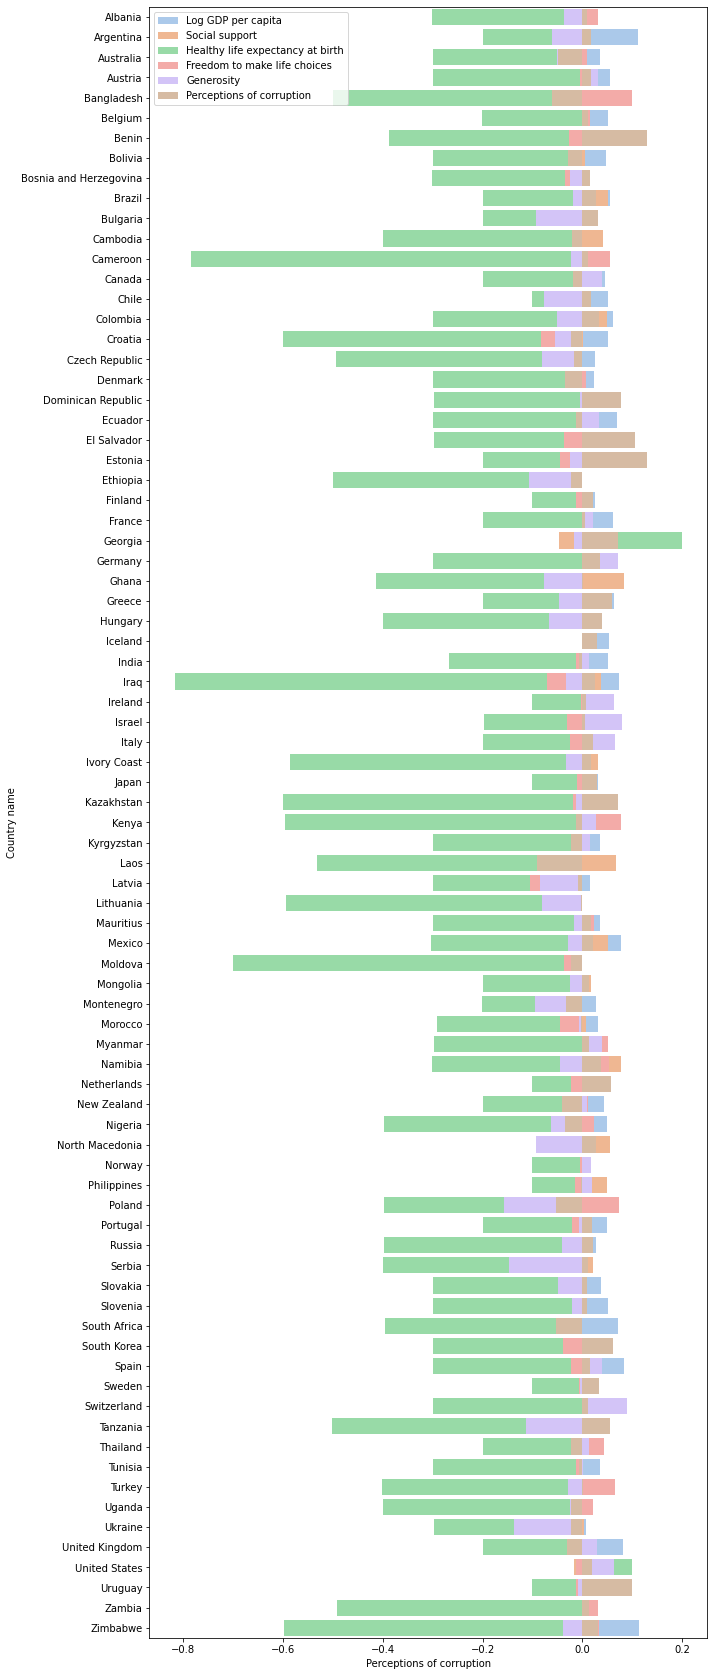

In [5]:

plt.figure(figsize=(10,30))
colors = sns.color_palette("pastel")
col_no = 0
for col in difference.columns[1:-1]:
    sns.barplot(y=difference.index, x=difference[col], color=colors[col_no], label = col) # Your code here
    col_no+=1
plt.legend()
plt.show()

In order to have a more global understanding of the happiness changes, we visualised a choropleth of the changes in the average of the happiness metrics. It can be seen that the western eauropean and north american countries had an increase in the average of happiness metrics. However, some african countries, north asian countries, India and Iraq had a decrease in the average of happiness metrics.

In [55]:
#map overall changes
import plotly.graph_objects as go
import plotly

difference.avg.sort_values()

map_data = difference[['avg']]

df = pd.read_csv(path + "//input//world_country_codes.csv")
df = df.rename(columns={"COUNTRY":"Country name"}).set_index("Country name")
map_data =pd.merge(map_data,df[["CODE"]], left_index=True, right_index=True)

fig = go.Figure(data=go.Choropleth(
    locations = map_data['CODE'],
    z = map_data['avg'],
    text = map_data.index,
    colorscale = 'fall',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Average change',
))

fig.update_layout(
    title_text='The difference of average of happiness metrics from 2019 to 2020',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False
    )]
)

fig.write_html("plot_data.html")
from IPython.display import IFrame
IFrame("plot_data.html",700, 450)

In order to better understand the correlation of metric on each other and averages, we visualise a heatmap of the correlations

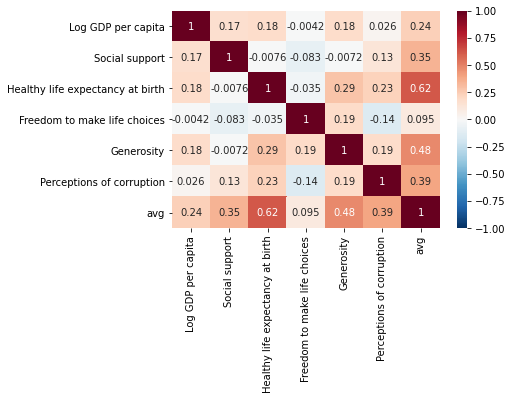

In [68]:
corr = difference[difference.columns[1:]].corr() #ignoring country column
plt.figure()
sns.heatmap(corr, center=0, annot=True, vmin=-1, vmax=1, cmap="RdBu_r")
plt.show()

The correlation heatmap shows the how changes of happiness measures correlate to each other. For instance, it can be seen that change in "Freedom of making life choices" reversely correlates with "perception of corruption" changes. That is, if there was an increase in "freedom of making life choices" from 2019 to 2020, "perception of corruption" decreased from 2019 to 2020 and vice versa. That is also consistant with our earlier correlation analysis on the whole data. We can also see that the changes in the average of happiness measurements were correlated with "generosity" and "life expentancy". This is aligend with the barcharts, which showed a noticiable changes in "life expectacy" and "genorisity" in many countries. 

Since every country had different COVID19 situation, it is useful to include the number of confirmed cases, deaths and mortality rate in each country to investigate how that affected the happiness changes. Thus, we m[the global covid19 data](https://www.kaggle.com/paultimothymooney/coronavirus-covid19-mortality-rate-by-country?select=global_covid19_mortality_rates.csv) to the happiness difference data by the country for furthur analysis.

In [24]:
covid_cases_path = path + "//input//global_covid19_mortality_rates.csv"
covid_cases = pd.read_csv(covid_cases_path)
covid_cases.head()

,Unnamed: 0,Country,Confirmed,Deaths,Mortality Ratio,Latitude,Longitude,Country_Code
0,0,Afghanistan,39145.0,1446.0,3.69,33.939110,67.709953,AF
1,1,Albania,12787.0,370.0,2.89,41.153332,20.168331,AL
2,2,Algeria,50400.0,1698.0,3.37,28.033886,1.659626,DZ
3,3,Andorra,1753.0,53.0,3.02,42.546245,1.601554,AD
4,4,Angola,4363.0,159.0,3.64,-11.202692,17.873887,AO


In [51]:
covid_case_by_country = covid_cases.set_index("Country")[["Confirmed", "Deaths", "Mortality Ratio"]]
world_happines_covid_case = difference.join(covid_case_by_country)
world_happines_covid_case.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,avg,Confirmed,Deaths,Mortality Ratio
Country name,,,,,,,,,,,
Albania,-0.248,0.023,-0.013,-0.301,0.031,-0.037,0.010,-0.076429,12787.0,370.0,2.89
Argentina,0.028,0.112,0.001,-0.200,0.005,-0.060,0.018,-0.013714,664799.0,14376.0,2.16
Australia,0.046,0.036,0.003,-0.300,0.009,-0.051,-0.049,-0.043714,26980.0,861.0,3.19
Austria,0.055,0.055,0.009,-0.300,-0.004,0.031,0.017,-0.019571,39984.0,777.0,1.94
Bangladesh,-0.255,-0.018,-0.046,-0.500,0.100,-0.032,-0.060,-0.115857,353844.0,5044.0,1.43


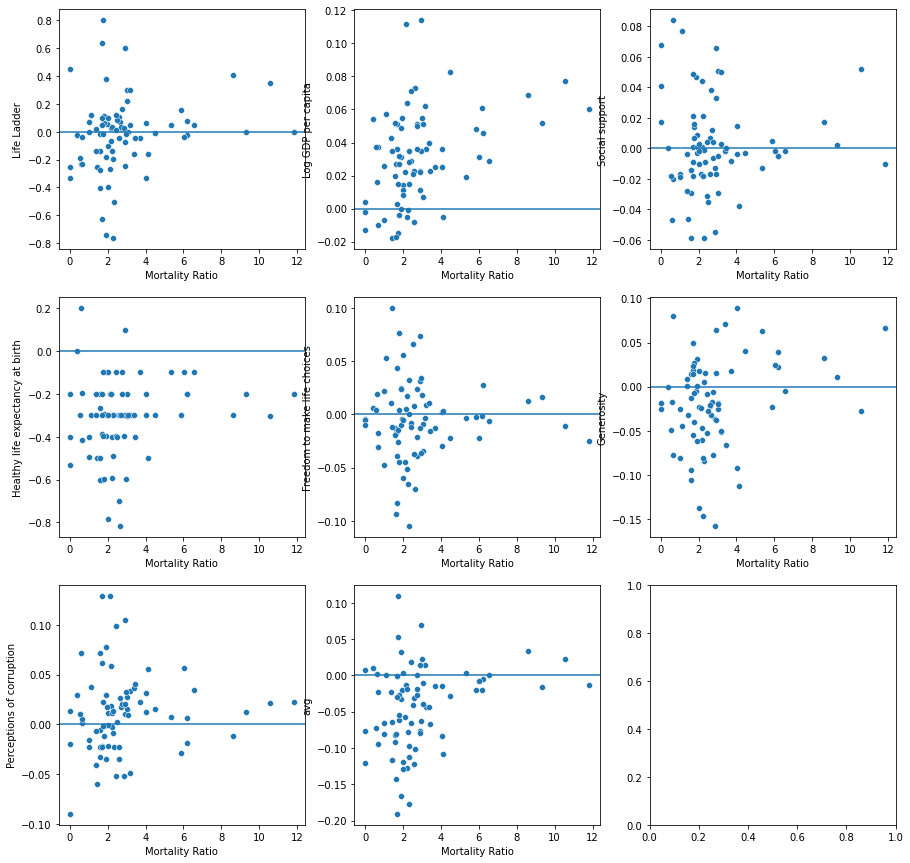

In [56]:

filtered = world_happines_covid_case
fig, axes = plt.subplots(3,3,figsize=(15,15))
for col_num,col in enumerate(happiness_data.columns[2:]):
    graph = sns.scatterplot(x=filtered['Mortality Ratio'], y=filtered[col], ax=axes[col_num//3,col_num%3])
    graph.axhline(0)
    
plt.show()